In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
df = pd.read_excel('./酒店数据.csv')
df.head(2)

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b',\xc3\xfb\xd7\xd6,\xc0\xe0'

In [ ]:
df.shape

In [ ]:
#获取index和columns
df.index
df.columns

In [ ]:
#每个地区的评分人数的总和以及均值

df['评分人数'] = df['评分人数'].astype('int')
df.评分人数.groupby(df['地区']).agg([np.sum,np.mean])

In [ ]:
#每个酒店类型的平均价格、最高价、最低价
df['价格'] = df['价格'].astype('int')
df['价格'].groupby(df['类型']).agg([np.mean,np.max,np.min])

（6）数据离散化，按照价格将酒店分为3个等级,0-500为C，500-1000为B,大于1000为A，列名设置为“价格等级”。

In [3]:
#按价格将酒店分类
df['价格等级'] = pd.cut(df['价格'],bins=[0,500,1000,50000],labels=['C','B','A'])
df.head()

NameError: name 'df' is not defined

In [4]:
#获取评分均值最高和最低的地区的数据

df['评分'] = df['评分'].astype('int')
group=df['评分'].groupby(df['地区']).mean()
group.sort_values(ascending=False)

NameError: name 'df' is not defined

In [5]:
avg_max = df[df.地区.isin(['观塘','荃湾','罗湖区','深水埗区','沙田','屯门','元朗','东区'])]
avg_min = df[df.地区 == '油尖旺']

NameError: name 'df' is not defined

In [10]:
avg_max.append(avg_min).head()

,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级
0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B
3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B
17,香港悦来酒店(Panda Hotel),休闲度假,香港,荃湾,荃湾 荃华街3号,4,13694,358,C
20,香港北角海逸酒店(Harbour Plaza North Point),海滨风光,香港,东区,"北角 英皇道665号(665 Kings Road, North Point, Hong K...",4,3980,507,B
21,香港帝景酒店(Royal View Hotel),海滨风光,香港,荃湾,汀九 青山公路353号,4,3289,418,C


In [11]:
pd.concat([avg_max,avg_min]).head()

,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级
0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B
3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B
17,香港悦来酒店(Panda Hotel),休闲度假,香港,荃湾,荃湾 荃华街3号,4,13694,358,C
20,香港北角海逸酒店(Harbour Plaza North Point),海滨风光,香港,东区,"北角 英皇道665号(665 Kings Road, North Point, Hong K...",4,3980,507,B
21,香港帝景酒店(Royal View Hotel),海滨风光,香港,荃湾,汀九 青山公路353号,4,3289,418,C


（8）数据离散化，按照评分人数将酒店平均分为3个等级，三个等级的酒店数量尽量保持一致。评分人数最多的为A，最少的为C。列名设置为“热门等级”。

In [12]:
#按评论人数增加热门等级维度

k = np.array(df['评分人数'].values)
k.sort()
len(k)/3

132.0

In [13]:
bins = [k[0],k[132],k[264],k[-1]]
df['热门等级']=pd.cut(df['评分人数'],bins,labels=['C','B','A'])
df.head()

,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级,热门等级
0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B,A
1,香港碧荟酒店(The BEACON),商务出行,香港,油尖旺,九龙旺角洗衣街88号,4,328,747,B,B
2,香港湾仔帝盛酒店(Dorsett Wanchai),浪漫情侣,香港,湾仔,皇后大道东387-397号,4,5014,693,B,A
3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B,A
4,香港隆堡柏宁顿酒店(Hotel Pennington by Rhombus),浪漫情侣,香港,湾仔,铜锣湾边宁顿街13-15号,4,1938,869,B,B


In [14]:
#获取最热门酒店平均评分
df[(df.价格等级=='A')&(df.热门等级=='A')]['评分'].mean()

4.0

In [15]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

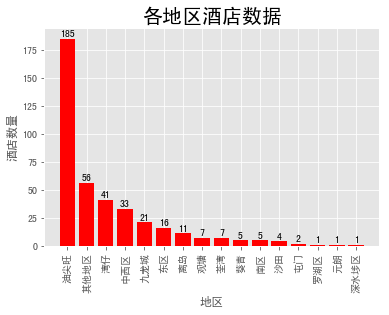

In [16]:
#每个地区酒店数量分布

data = df['地区'].value_counts()
x = data.index
y = data.values

plt.bar(x,y,color='r')
plt.title('各地区酒店数据',fontsize=20)
plt.xlabel('地区',fontsize=12)
plt.ylabel('酒店数量',fontsize=12)
plt.xticks(rotation=90)

for a,b in zip(x,y):
    plt.text(a,b+1,'%.0f'% b,ha='center',va='bottom',fontsize=10)
plt.show()

In [17]:
#各个价格等级酒店数量分布

data = df['价格等级'].value_counts()
x = data.index
y = data.values

In [18]:
x

CategoricalIndex(['C', 'B', 'A'], categories=['C', 'B', 'A'], ordered=True, dtype='category')

In [19]:
y

array([232,  96,  68])

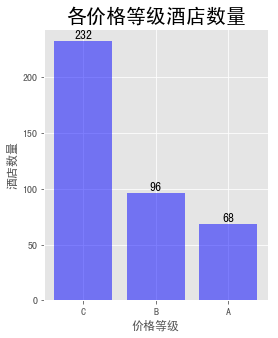

In [20]:
plt.figure(figsize=(4,5))
plt.bar(x,y,color='b',alpha=0.5)
plt.xlabel('价格等级',fontsize=12)
plt.ylabel('酒店数量',fontsize=12)
plt.title('各价格等级酒店数量',fontsize=20)
for a,b in zip(x,y):
    plt.text(a,b+1,'%.0f'% b,ha='center',va='bottom',fontsize=12)
plt.show()

In [21]:
#各价格等级酒店占比分布

data = df['价格等级'].value_counts()

In [22]:
data

C    232
B     96
A     68
Name: 价格等级, dtype: int64

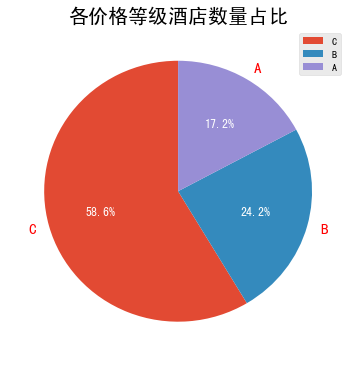

In [23]:
label = data.index
y = data.values
y = y/sum(y)

plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(y,labels=label,autopct='%.1f%%',startangle = 90)
plt.title('各价格等级酒店数量占比',fontsize=20)

for i in p_text:
    i.set_size(12)
    i.set_color('w')

for i in l_text:
     i.set_size(15)
     i.set_color('r')


plt.legend()
    
plt.show()

In [24]:
#各热门等级酒店平均评分

data = df['评分'].groupby(df['热门等级']).mean()
data

热门等级
C    3.551181
B    3.924242
A    3.977099
Name: 评分, dtype: float64

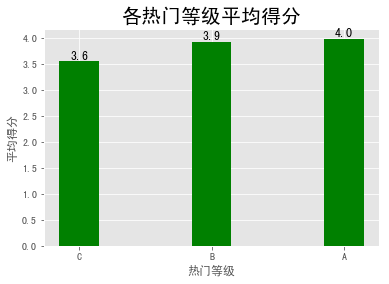

In [25]:
x = data.index
y = data.values

plt.figure(figsize=(6,4))
plt.bar(x,y,color='g',width=0.3)
plt.title('各热门等级平均得分',fontsize=20)
plt.xlabel('热门等级',fontsize=12)
plt.ylabel('平均得分',fontsize=12)


for a,b in zip(x,y):
    plt.text(a,b,'%.1f'% b,ha='center',va='bottom',fontsize=12)
plt.show()

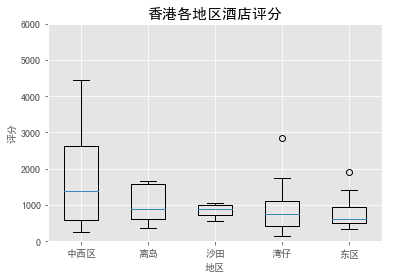

In [26]:
#平均价格top5地区酒店价位箱型图

data = df.groupby(df['地区'])['价格'].mean()
data = data.sort_values(ascending=False)[0:5]

dataa = df[df.地区=='中西区']['价格']
datab = df[df.地区=='离岛']['价格']
datac = df[df.地区=='沙田']['价格']
datad = df[df.地区=='湾仔']['价格']
datae = df[df.地区=='东区']['价格']
plt.boxplot([dataa,datab,datac,datad,datae],labels=['中西区','离岛','沙田','湾仔','东区'],whis= 2)
plt.title('香港各地区酒店评分',fontsize=15)
plt.xlabel('地区',fontsize=10)
plt.ylabel('评分',fontsize=10)
plt.ylim([0,6000])
plt.show()